## Adaptive quadrature

* In general function integration is termed *quadrature*
* Question, how use adaptive grids to most efficiently and accuratly represent and integral.
    * We would like to put more points where there is more *action* in the function.
    * Place few points with a large $\Delta x$ in regions where the function or is slope are relatively constant.
    * Place more points where there are significant changes in the function.
* This can be done with a **recursive** algorithm as follows.
    * The simplest possible trapazoid representation of a function integration over an interval $[a,\,b]$ is
    
    $$I_1 = (a-b)\frac{f(a)+f(b)}{2}$$.
    
    * Now, we can compare this to an integral using two trapazoids over two half-intervals: one from $a$ to $m$, and one from $m$ to $b$, where $m=(a+b)/$ is the midpoint of the interval:
    
    \begin{align}
    I_2 &= \frac{a-b}{2}\frac{f(a)+f(m)}{2} + \frac{a-b}{2}\frac{f(m)+f(b)}{2}, \\
        &= \frac{a-b}{4}(f(a)+2f(m)+f(b)).
    \end{align}
    
    * The relative difference in the integrals is 
    
    $$\epsilon_r = \left|\frac{I_1-I_2}{I_2}\right|.$$
    
    * If $\epsilon_r \le \text{rtol}$, where $\text{rtol}$ is some desired tolerance, then the integral is considered accurate and we take $I=\int_a^bf(x)dx\approx I_2.$
    * If $\epsilon_r > \text{rtol}$, then we repeat this whole process separately on the two half-intervals. 
        * Each of these half-intervals may require different levels of subdivision. 
    * We implement this using a simple recursive function as shown below.
    * Note that this can be used with Simpson's method instead of the Trapazoid method, or others. 
    
### Example

Compute the following function using a Recursive Trapazoid method:

$$I = \int_0^1 x\tanh\left(50\left(x-\frac{1}{2}\right)\right) + 1\,dx.$$

The function being integrated is shown in the plot below.
    

In [10]:
using Plots
using PyFormattedStrings
using QuadGK

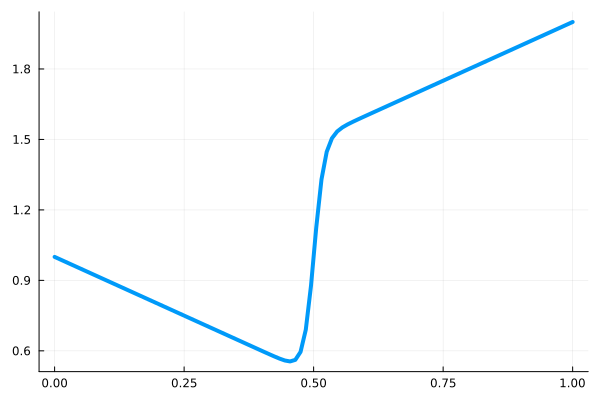

In [42]:
f(x) = x*tanh(50*(x-0.5)) + 1.0

x = LinRange(0,1,100)
plot(x,f.(x), legend=nothing, lw=4)

In [43]:
xmstore = Float64[] 

function adaptTrap(f, xa, xb, tol=1E-4)
    
    Δx = xb - xa
    Δx2 = Δx/2
    xm = 0.5*(xa+xb)
    
    append!(xmstore, xm)
    
    I1 = Δx*(f(xa) + f(xb))/2
    I2 = Δx2*(f(xa) + f(xm))/2 + Δx2*(f(xm) + f(xb))/2
    
    err = abs((I1-I2)/I2)
    if err <= tol
        return I2
    else
        return adaptTrap(f, xa, xm, tol) + adaptTrap(f, xm, xb, tol)
    end
end
    
I = adaptTrap(f, 0, 1, 1E-2)

1.2495345133990483


I_adapt = 1.24953451
I_quad  = 1.24967101


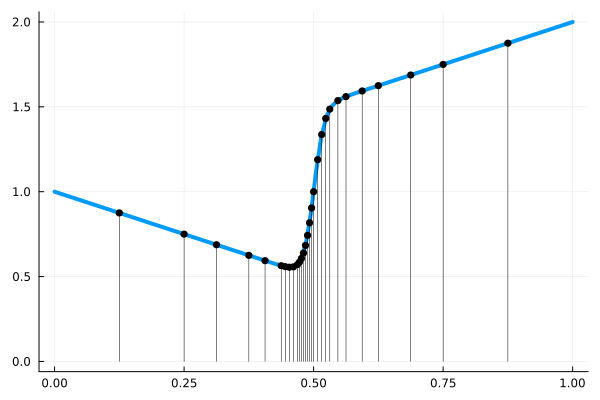

In [45]:
println(f"\nI_adapt = {I:.8f}")
println(f"I_quad  = {quadgk(f,0,1)[1]:.8f}")

x = LinRange(0,1,100)
y = f.(x)
plot(x,y, legend=nothing, lw=4)
 
ymstore = f.(xmstore)
plot!(xmstore,ymstore, line=:stem, marker=:circle, color="black", lw=0.5 )
